In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
df_ecommerce = pd.read_csv("/content/ecommerceDataset.csv", names=["category", "description"], header=None)

In [17]:
df_ecommerce.head(3)

,category,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...


In [18]:
# Value Counts
df_ecommerce['category'].value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: category, dtype: int64

In [19]:
df_ecommerce.category.replace("Clothing & Accessories", "Clothing_Accessories", inplace=True)

In [20]:
df_ecommerce.dropna(inplace=True)
df_ecommerce.shape

(50424, 2)

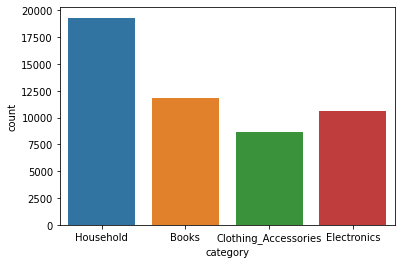

In [21]:
# Plot
sns.countplot(x='category',data=df_ecommerce)

In [22]:
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# Load Text Cleaning Pkgs
import neattext.functions as nfx
# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [24]:
# Stopwords
from neattext.functions import clean_text

df_ecommerce['Clean_description'] = df_ecommerce['description'].apply(nfx.remove_stopwords)

In [25]:
df_ecommerce.head()

,category,description,Clean_description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...","SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...","SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...,Incredible Gifts India Wooden Happy Birthday U...


In [26]:
# Features & Labels
X = df_ecommerce['Clean_description']
y = df_ecommerce['category']

In [27]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [28]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [29]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [30]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [31]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

SVM Model

In [32]:
from sklearn import svm

In [33]:
pipe_lr1 = Pipeline(steps=[('cv',CountVectorizer()),('lr',svm.SVC())])

In [ ]:
pipe_lr1.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', SVC())])

In [ ]:
# Check Accuracy
pipe_lr1.score(x_test,y_test)

In [ ]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.9782845810609817

In [ ]:
# Make A Prediction
ex1 = "513 Knitted self design women's muffler This knitted self design is frafted from wool/acrylic in multicolour It provides winter soft and warm. "

In [ ]:
pipe_lr1.predict([ex1])